In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For data splitting
from sklearn.model_selection import train_test_split
# For standardization
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

In [2]:
# Read the online wine data set with no headers
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# Assign column labels
# The feature names can be found online.
df_wine.columns = ['Class label', 
              'Alcohol', 
              'Malic acid', 
              'Ash', 
              'Alcalinity of ash', 
              'Magnesium', 
              'Total phenols', 
              'Flavanoids', 
              'Nonflavanoid phenols', 
              'Proanthocyanins', 
              'Color intensity', 
              'Hue', 
              'OD280/OD315 of diluted wines', 
              'Proline']

# Split the data set into a training set and a test set
y = df_wine.iloc[:, 0].values
X = df_wine.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
# test_size=0.3: the testing set contains 30% data
# stratify=y: both the train and testing sets have the same class proportions as the original dataset.

# Standardization
# Create a scaler
stdsc = StandardScaler()
# Fit and transform the training set
X_train_std = stdsc.fit_transform(X_train)
# Transform the testing set with the same scaler
X_test_std = stdsc.transform(X_test)

In [3]:
# Covariance
# Note that np.cov require each column of the data matrix represents a single observation.
# Therefore, we need to transpose the matrix.
cov_mat = np.cov(X_train_std.T) 

In [4]:
# Eigen values and vectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# eigen_vals: 1D array, all evals
# eigen_vecs: each column is an eigenvector.
print("Eigenvalues:\n",eigen_vals)

Eigenvalues:
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [5]:
# Explained variance ratio
tot = np.sum(eigen_vals)
var_ratio = [x/tot for x in sorted(eigen_vals, reverse=True)]
var_ratio_cum = np.cumsum(var_ratio)




[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13')]

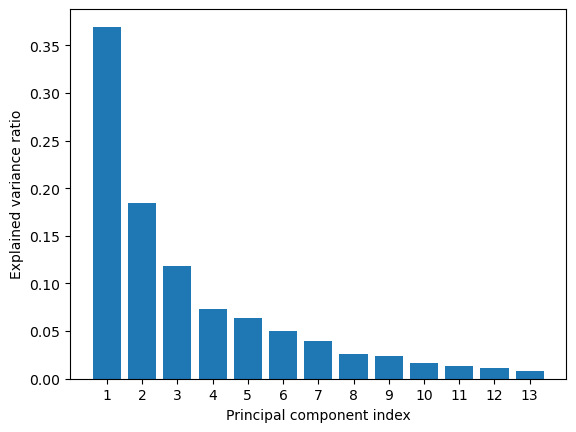

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(range(1,14), var_ratio, align="center")
ax.set_xlabel("Principal component index")
ax.set_ylabel("Explained variance ratio")
ax.set_xticks(range(1,14))
ax.set_xticklabels(range(1,14))

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13')]

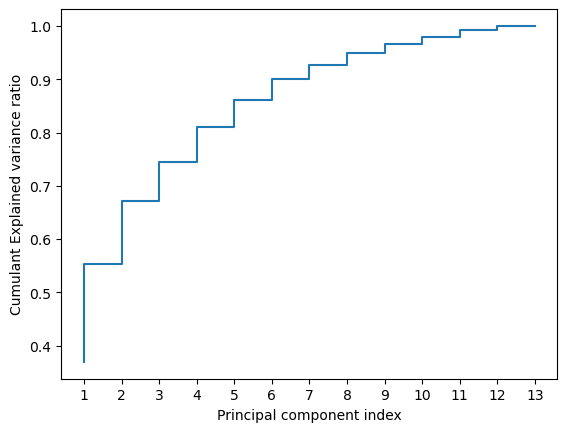

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.step(range(1,14), var_ratio_cum)

ax.set_xlabel("Principal component index")
ax.set_ylabel("Cumulant Explained variance ratio")
ax.set_xticks(range(1,14))
ax.set_xticklabels(range(1,14))

In [8]:
# Sort the eigen values for transformation
# Make a list of (eval, evect) tuples
eigen_pairs = [(eigen_vals[i], eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# Sort the eigen pairs from high to low
eigen_pairs.sort(key = lambda k: k[0], reverse=True)
# key: this input is a function. We sort the list according to the output of this function, not the original entries.

In [9]:
# Select the first two principal components to construct the transformation matrix
W = np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
# Note that the notation array[:,i] does not return a column. Instead, it returns a row vector.
# eigen_pairs[0][1][:,np.newaxis] converts the 1D array eigen_pairs[0][1] into a column matrix.
W

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [10]:
# Transform the training data
X_train_pca = np.dot(X_train_std, W)

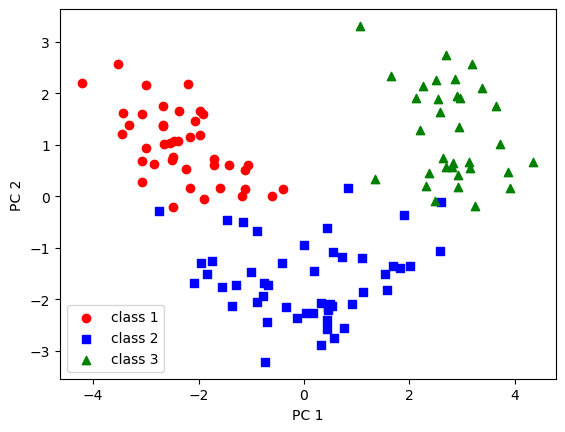

In [11]:
# Visualize the transformed data
fig = plt.figure()
ax = fig.add_subplot(111)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], color=c, marker=m, label=f"class {l}")
    
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend()

In [18]:
# Contribution of the original features to the principal components
# It is measured by the correlation coefficient between an old feature and a principal component
# These correlation coefficients are also called loadings.
loadings = eigen_vecs * np.sqrt(eigen_vals)

(-1.0, 1.0)

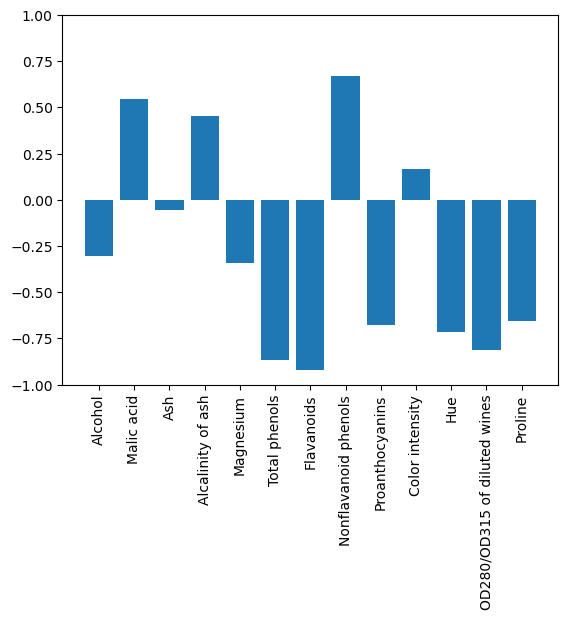

In [23]:
# Plot the loadings of the first PC
fig = plt.figure()
ax = fig.add_subplot()

ax.bar(range(len(eigen_vals)), loadings[:,0], align="center")

ax.set_xticks(range(len(eigen_vals)))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

ax.set_ylim([-1,1])